### This notebook generates spinless BBH waveform template as in Heurta's paper

* All waveform saves in a single HDF5 file, with filename defined in HDF5_FILE
* For testing purpose and reducing the file size, only Hplus component of waveform, with smaller sampling rate and larger F_low, are generated. I also generate a coarser template bank with delta_M = 2 (Heurta use 1)


('Numbers of waveform : ', 650)


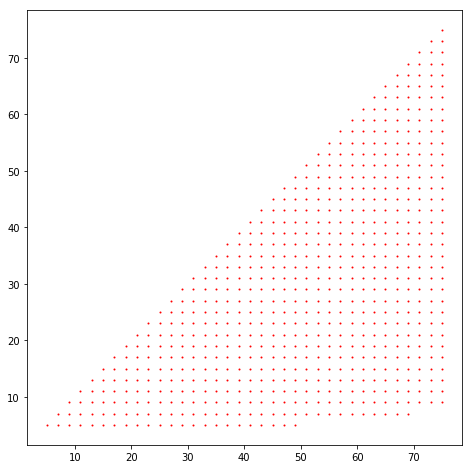

In [58]:
##
##  First, let'e make a (m1,m2) parameter table for the template
##

import pycbc
from pycbc.waveform import td_approximants, fd_approximants, get_td_waveform
import matplotlib.pyplot as plt
%matplotlib inline
import itertools

#### 
MINM=5
MAXM=75
dM=2
m1a = []
m2a = []
for m1 in range(MINM, MAXM+1, dM):     
    for m2 in range(m1, MAXM+1, dM):    ###  m2>=m1
        if (float(m2)/m1<=10):
            m1a.append(m1)
            m2a.append(m2)

print ("Numbers of waveforms : ", len(m1a))            
plt.figure(figsize=(8,8))
plt.plot(m2a, m1a, 'r.', markersize=2)
plt.axes().set_aspect('equal')
plt.show()

In [59]:
##
##  This function tell you all TD waveform model supported in pyCBC.
##  We will use SEOBNRv4
##

import pycbc
print pycbc.waveform.td_approximants()

['TEOBResum_ROM', 'TaylorEt', 'SEOBNRv3_opt', 'IMRPhenomA', 'IMRPhenomC', 'IMRPhenomB', 'EOBNRv2', 'NRSur7dq2', 'TEOBv4', 'SEOBNRv4_opt', 'PhenSpinTaylor', 'PhenSpinTaylorRD', 'NR_hdf5', 'TEOBv2', 'SEOBNRv3_pert', 'EOBNRv2HM', 'SpinTaylorT4', 'TaylorT1', 'TaylorT3', 'TaylorT2', 'HGimri', 'TaylorT4', 'IMRPhenomD', 'IMRPhenomPv2', 'SEOBNRv1', 'SpinDominatedWf', 'SEOBNRv3', 'SEOBNRv2', 'SpinTaylorT1', 'SEOBNRv4', 'SpinTaylorT2', 'EccentricTD', 'SEOBNRv2_opt', 'SEOBNRv3_opt_rk4']


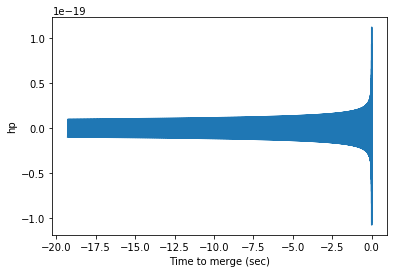

In [60]:
###
###  For you yo get a feeling about the waveform, here m=(5,5) waveform is plotted.
###

import pycbc.psd

import matplotlib.pyplot as plt
%matplotlib inline

import itertools

RATE=8192
FLOW=20
apx='SEOBNRv4'
#for m1,m2 in itertools.izip(m1a,m2a):

for m1,m2 in itertools.izip([5],[5]):
    hp, hc = pycbc.waveform.get_td_waveform(approximant=apx,
             mass1=m1, mass2=m2, spin1z=0, delta_t=1.0/RATE, f_lower=FLOW)

    plt.plot(hp.sample_times, hp, label=apx)
    plt.xlabel("Time to merge (sec)")
    plt.ylabel("hp")


In [61]:
##
##  Write to HDF5
##
import pycbc.psd
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import h5py

###
HDF5_FILE = 'bbh_wftpl.h5'
RATE      = 4096  # sampling rate 
FLOW      = 40    # lower cutoff frequency
apx       = 'SEOBNRv4'

f.close()
f = h5py.File(HDF5_FILE, 'w', libver='latest')

###
main_grp = f.create_group("/waveform")
main_grp.attrs['srate'] = RATE
main_grp.attrs['F_low'] = FLOW
main_grp.attrs['model'] = apx
main_grp.attrs['desc'] = "Spinless BBH waveform model"

###
count = 0
dt = 1.0/RATE
for m1,m2 in itertools.izip(m1a,m2a):
    hp, hc = pycbc.waveform.get_td_waveform(approximant=apx,
        mass1=m1, mass2=m2, spin1z=0, delta_t=dt, f_lower=FLOW)

    gname = "%s" % count    
    print ("Creating waveform %s with mass %.1f, %.1f (# %d)..." % (gname, m1, m2, len(hp.sample_times) ))
    grp = main_grp.create_group(gname)
    grp.attrs['m'] = [m1,m2]
    grp.attrs['sz'] = [0,0]
    grp.create_dataset("t2m",  data=hp.sample_times, dtype='f')  # compression='gzip'
    grp.create_dataset("hp",  data=hp, dtype='f') #, compression='gzip'
    #grp.create_dataset("hc",  data=hc, dtype='f') #, compression='gzip'

    count = count+1
    #if (count > 4):         break
        
print ("Done.")
f.close()

Creating waveform 0 with mass 5.0, 5.0 (# 12311)...
Creating waveform 1 with mass 5.0, 7.0 (# 9279)...
Creating waveform 2 with mass 5.0, 9.0 (# 7526)...
Creating waveform 3 with mass 5.0, 11.0 (# 6366)...
Creating waveform 4 with mass 5.0, 13.0 (# 5534)...
Creating waveform 5 with mass 5.0, 15.0 (# 4903)...
Creating waveform 6 with mass 5.0, 17.0 (# 4405)...
Creating waveform 7 with mass 5.0, 19.0 (# 3999)...
Creating waveform 8 with mass 5.0, 21.0 (# 3662)...
Creating waveform 9 with mass 5.0, 23.0 (# 3376)...
Creating waveform 10 with mass 5.0, 25.0 (# 3129)...
Creating waveform 11 with mass 5.0, 27.0 (# 2915)...
Creating waveform 12 with mass 5.0, 29.0 (# 2726)...
Creating waveform 13 with mass 5.0, 31.0 (# 2559)...
Creating waveform 14 with mass 5.0, 33.0 (# 2409)...
Creating waveform 15 with mass 5.0, 35.0 (# 2276)...
Creating waveform 16 with mass 5.0, 37.0 (# 2155)...
Creating waveform 17 with mass 5.0, 39.0 (# 2045)...
Creating waveform 18 with mass 5.0, 41.0 (# 1945)...
Creat

Creating waveform 155 with mass 15.0, 17.0 (# 1793)...
Creating waveform 156 with mass 15.0, 19.0 (# 1652)...
Creating waveform 157 with mass 15.0, 21.0 (# 1538)...
Creating waveform 158 with mass 15.0, 23.0 (# 1444)...
Creating waveform 159 with mass 15.0, 25.0 (# 1367)...
Creating waveform 160 with mass 15.0, 27.0 (# 1301)...
Creating waveform 161 with mass 15.0, 29.0 (# 1245)...
Creating waveform 162 with mass 15.0, 31.0 (# 1197)...
Creating waveform 163 with mass 15.0, 33.0 (# 1156)...
Creating waveform 164 with mass 15.0, 35.0 (# 1120)...
Creating waveform 165 with mass 15.0, 37.0 (# 1091)...
Creating waveform 166 with mass 15.0, 39.0 (# 1062)...
Creating waveform 167 with mass 15.0, 41.0 (# 1038)...
Creating waveform 168 with mass 15.0, 43.0 (# 1020)...
Creating waveform 169 with mass 15.0, 45.0 (# 1004)...
Creating waveform 170 with mass 15.0, 47.0 (# 988)...
Creating waveform 171 with mass 15.0, 49.0 (# 976)...
Creating waveform 172 with mass 15.0, 51.0 (# 965)...
Creating wave

Creating waveform 306 with mass 25.0, 39.0 (# 914)...
Creating waveform 307 with mass 25.0, 41.0 (# 907)...
Creating waveform 308 with mass 25.0, 43.0 (# 902)...
Creating waveform 309 with mass 25.0, 45.0 (# 898)...
Creating waveform 310 with mass 25.0, 47.0 (# 897)...
Creating waveform 311 with mass 25.0, 49.0 (# 897)...
Creating waveform 312 with mass 25.0, 51.0 (# 897)...
Creating waveform 313 with mass 25.0, 53.0 (# 900)...
Creating waveform 314 with mass 25.0, 55.0 (# 903)...
Creating waveform 315 with mass 25.0, 57.0 (# 907)...
Creating waveform 316 with mass 25.0, 59.0 (# 911)...
Creating waveform 317 with mass 25.0, 61.0 (# 917)...
Creating waveform 318 with mass 25.0, 63.0 (# 923)...
Creating waveform 319 with mass 25.0, 65.0 (# 929)...
Creating waveform 320 with mass 25.0, 67.0 (# 935)...
Creating waveform 321 with mass 25.0, 69.0 (# 943)...
Creating waveform 322 with mass 25.0, 71.0 (# 950)...
Creating waveform 323 with mass 25.0, 73.0 (# 958)...
Creating waveform 324 with m

Creating waveform 458 with mass 37.0, 73.0 (# 1015)...
Creating waveform 459 with mass 37.0, 75.0 (# 1026)...
Creating waveform 460 with mass 39.0, 39.0 (# 890)...
Creating waveform 461 with mass 39.0, 41.0 (# 893)...
Creating waveform 462 with mass 39.0, 43.0 (# 898)...
Creating waveform 463 with mass 39.0, 45.0 (# 902)...
Creating waveform 464 with mass 39.0, 47.0 (# 909)...
Creating waveform 465 with mass 39.0, 49.0 (# 915)...
Creating waveform 466 with mass 39.0, 51.0 (# 922)...
Creating waveform 467 with mass 39.0, 53.0 (# 930)...
Creating waveform 468 with mass 39.0, 55.0 (# 938)...
Creating waveform 469 with mass 39.0, 57.0 (# 946)...
Creating waveform 470 with mass 39.0, 59.0 (# 956)...
Creating waveform 471 with mass 39.0, 61.0 (# 965)...
Creating waveform 472 with mass 39.0, 63.0 (# 974)...
Creating waveform 473 with mass 39.0, 65.0 (# 984)...
Creating waveform 474 with mass 39.0, 67.0 (# 994)...
Creating waveform 475 with mass 39.0, 69.0 (# 1005)...
Creating waveform 476 wit

Creating waveform 608 with mass 59.0, 65.0 (# 1101)...
Creating waveform 609 with mass 59.0, 67.0 (# 1114)...
Creating waveform 610 with mass 59.0, 69.0 (# 1125)...
Creating waveform 611 with mass 59.0, 71.0 (# 1139)...
Creating waveform 612 with mass 59.0, 73.0 (# 1152)...
Creating waveform 613 with mass 59.0, 75.0 (# 1164)...
Creating waveform 614 with mass 61.0, 61.0 (# 1089)...
Creating waveform 615 with mass 61.0, 63.0 (# 1101)...
Creating waveform 616 with mass 61.0, 65.0 (# 1114)...
Creating waveform 617 with mass 61.0, 67.0 (# 1126)...
Creating waveform 618 with mass 61.0, 69.0 (# 1139)...
Creating waveform 619 with mass 61.0, 71.0 (# 1151)...
Creating waveform 620 with mass 61.0, 73.0 (# 1165)...
Creating waveform 621 with mass 61.0, 75.0 (# 1177)...
Creating waveform 622 with mass 63.0, 63.0 (# 1114)...
Creating waveform 623 with mass 63.0, 65.0 (# 1126)...
Creating waveform 624 with mass 63.0, 67.0 (# 1139)...
Creating waveform 625 with mass 63.0, 69.0 (# 1152)...
Creating w

In [62]:
###
###  List the structure of this HDF5 file
###

def printname(name):
    print name
def print_attrs(name, obj):
    print (name)
    for key, val in obj.attrs.iteritems():
        print ("    %s: %s" % (key, val))
    
f = h5py.File(HDF5_FILE,'r')
#print (f.attrs.items())
#f.visit(printname)
f.visititems(print_attrs)
f.close()  

waveform
    srate: 4096
    F_low: 40
    model: SEOBNRv4
    desc: Spinless BBH waveform model
waveform/241
    m: [19 71]
    sz: [0 0]
waveform/241/t2m
waveform/241/hp
waveform/275
    m: [23 29]
    sz: [0 0]
waveform/275/t2m
waveform/275/hp
waveform/330
    m: [27 37]
    sz: [0 0]
waveform/330/t2m
waveform/330/hp
waveform/87
    m: [ 9 73]
    sz: [0 0]
waveform/87/t2m
waveform/87/hp
waveform/0
    m: [5 5]
    sz: [0 0]
waveform/0/t2m
waveform/0/hp
waveform/298
    m: [23 75]
    sz: [0 0]
waveform/298/t2m
waveform/298/hp
waveform/245
    m: [21 23]
    sz: [0 0]
waveform/245/t2m
waveform/245/hp
waveform/429
    m: [35 55]
    sz: [0 0]
waveform/429/t2m
waveform/429/hp
waveform/272
    m: [23 23]
    sz: [0 0]
waveform/272/t2m
waveform/272/hp
waveform/563
    m: [51 59]
    sz: [0 0]
waveform/563/t2m
waveform/563/hp
waveform/474
    m: [39 67]
    sz: [0 0]
waveform/474/t2m
waveform/474/hp
waveform/71
    m: [ 9 41]
    sz: [0 0]
waveform/71/hp
waveform/71/t2m
waveform/342
    

waveform/365/hp
waveform/223
    m: [19 35]
    sz: [0 0]
waveform/223/t2m
waveform/223/hp
waveform/372
    m: [29 73]
    sz: [0 0]
waveform/372/hp
waveform/372/t2m
waveform/97
    m: [11 27]
    sz: [0 0]
waveform/97/t2m
waveform/97/hp
waveform/186
    m: [17 19]
    sz: [0 0]
waveform/186/t2m
waveform/186/hp
waveform/137
    m: [13 43]
    sz: [0 0]
waveform/137/t2m
waveform/137/hp
waveform/12
    m: [ 5 29]
    sz: [0 0]
waveform/12/t2m
waveform/12/hp
waveform/29
    m: [ 7 19]
    sz: [0 0]
waveform/29/hp
waveform/29/t2m
waveform/300
    m: [25 27]
    sz: [0 0]
waveform/300/t2m
waveform/300/hp
waveform/216
    m: [19 21]
    sz: [0 0]
waveform/216/t2m
waveform/216/hp
waveform/343
    m: [27 63]
    sz: [0 0]
waveform/343/hp
waveform/343/t2m
waveform/192
    m: [17 31]
    sz: [0 0]
waveform/192/t2m
waveform/192/hp
waveform/352
    m: [29 33]
    sz: [0 0]
waveform/352/t2m
waveform/352/hp
waveform/486
    m: [41 55]
    sz: [0 0]
waveform/486/t2m
waveform/486/hp
waveform/438
    m

waveform/88/hp
waveform/103
    m: [11 39]
    sz: [0 0]
waveform/103/t2m
waveform/103/hp
waveform/109
    m: [11 51]
    sz: [0 0]
waveform/109/t2m
waveform/109/hp
waveform/428
    m: [35 53]
    sz: [0 0]
waveform/428/t2m
waveform/428/hp
waveform/382
    m: [31 47]
    sz: [0 0]
waveform/382/hp
waveform/382/t2m
waveform/353
    m: [29 35]
    sz: [0 0]
waveform/353/t2m
waveform/353/hp
waveform/160
    m: [15 27]
    sz: [0 0]
waveform/160/t2m
waveform/160/hp
waveform/443
    m: [37 43]
    sz: [0 0]
waveform/443/t2m
waveform/443/hp
waveform/334
    m: [27 45]
    sz: [0 0]
waveform/334/t2m
waveform/334/hp
waveform/361
    m: [29 51]
    sz: [0 0]
waveform/361/t2m
waveform/361/hp
waveform/52
    m: [ 7 65]
    sz: [0 0]
waveform/52/t2m
waveform/52/hp
waveform/499
    m: [43 47]
    sz: [0 0]
waveform/499/t2m
waveform/499/hp
waveform/212
    m: [17 71]
    sz: [0 0]
waveform/212/t2m
waveform/212/hp
waveform/460
    m: [39 39]
    sz: [0 0]
waveform/460/t2m
waveform/460/hp
waveform/505


    sz: [0 0]
waveform/139/t2m
waveform/139/hp
waveform/116
    m: [11 65]
    sz: [0 0]
waveform/116/t2m
waveform/116/hp
waveform/209
    m: [17 65]
    sz: [0 0]
waveform/209/t2m
waveform/209/hp
waveform/565
    m: [51 63]
    sz: [0 0]
waveform/565/t2m
waveform/565/hp
waveform/596
    m: [57 59]
    sz: [0 0]
waveform/596/t2m
waveform/596/hp
waveform/448
    m: [37 53]
    sz: [0 0]
waveform/448/hp
waveform/448/t2m
waveform/43
    m: [ 7 47]
    sz: [0 0]
waveform/43/t2m
waveform/43/hp
waveform/470
    m: [39 59]
    sz: [0 0]
waveform/470/t2m
waveform/470/hp
waveform/484
    m: [41 51]
    sz: [0 0]
waveform/484/t2m
waveform/484/hp
waveform/251
    m: [21 35]
    sz: [0 0]
waveform/251/hp
waveform/251/t2m
waveform/178
    m: [15 63]
    sz: [0 0]
waveform/178/t2m
waveform/178/hp
waveform/465
    m: [39 49]
    sz: [0 0]
waveform/465/t2m
waveform/465/hp
waveform/525
    m: [45 67]
    sz: [0 0]
waveform/525/t2m
waveform/525/hp
waveform/500
    m: [43 49]
    sz: [0 0]
waveform/500/t

waveform/294/t2m
waveform/294/hp
waveform/506
    m: [43 61]
    sz: [0 0]
waveform/506/t2m
waveform/506/hp
waveform/491
    m: [41 65]
    sz: [0 0]
waveform/491/t2m
waveform/491/hp
waveform/131
    m: [13 31]
    sz: [0 0]
waveform/131/hp
waveform/131/t2m
waveform/449
    m: [37 55]
    sz: [0 0]
waveform/449/t2m
waveform/449/hp
waveform/633
    m: [65 73]
    sz: [0 0]
waveform/633/t2m
waveform/633/hp
waveform/541
    m: [47 69]
    sz: [0 0]
waveform/541/t2m
waveform/541/hp
waveform/481
    m: [41 45]
    sz: [0 0]
waveform/481/hp
waveform/481/t2m
waveform/55
    m: [9 9]
    sz: [0 0]
waveform/55/t2m
waveform/55/hp
waveform/130
    m: [13 29]
    sz: [0 0]
waveform/130/t2m
waveform/130/hp
waveform/591
    m: [55 69]
    sz: [0 0]
waveform/591/t2m
waveform/591/hp
waveform/490
    m: [41 63]
    sz: [0 0]
waveform/490/hp
waveform/490/t2m
waveform/631
    m: [65 69]
    sz: [0 0]
waveform/631/t2m
waveform/631/hp
waveform/610
    m: [59 69]
    sz: [0 0]
waveform/610/t2m
waveform/610/

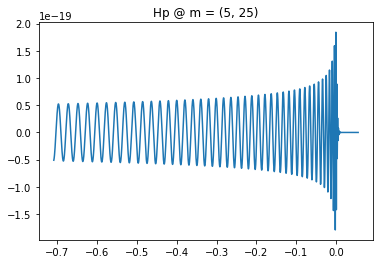

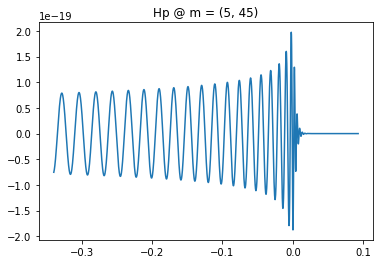

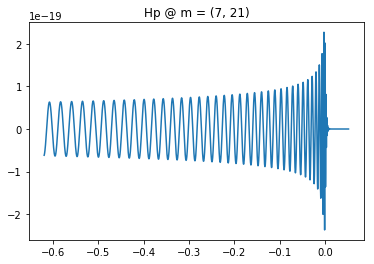

In [72]:
###
###  Read waveform from HDF5, and plot it. 
###

f = h5py.File(HDF5_FILE,'r')

for i in [10,20,30]:
    key = 'waveform/%d'%i
    k1  = 'waveform/%d/t2m'%i
    k2  = 'waveform/%d/hp'%i
    
    m1 = f[key].attrs['m'][0]
    m2 = f[key].attrs['m'][1]
    t2m = f[k1][:]
    hp  = f[k2][:]

    plt.plot(t2m, hp)
    plt.title("Hp @ m = (%d, %d)" % (m1,m2) )
    plt.figure()

f.close()  